<h4>
Resolução da atividade prática:
</h4>

<p>
Tópico A - Implemente o algoritmo K-Means visto em sala de aula<br>
    <br>i.	Medida de proximidade: distância Euclidiana
    <br>ii.	Centróides iniciais: escolher aleatoriamente K objetos da base de dados
    <br>iii.	K: parâmetro de entrada, especificado pelo usuário
    <br>iv.	O laço de repetição executado até a convergência do algoritmo terá limite máximo de 100 iterações
    <br>v.	Casos de empate na associação de um elemento ao centróide: escolher o primeiro.
</p>

<p>
Tópico B - Execute a técnica implementada usando uma base de dados pública, como por exemplo a base Íris<br>
</p>

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

(150, 2)

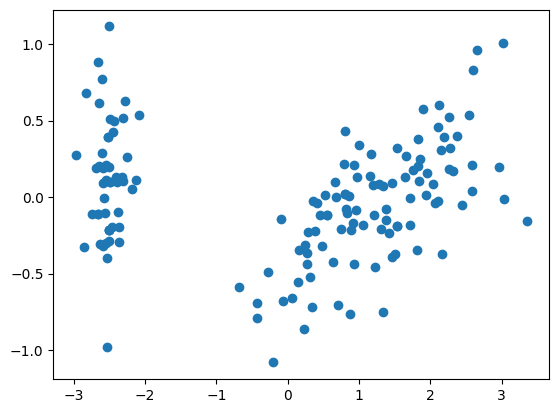

In [2]:
'''
    Importando o dataset a ser usado no
    processo de agrupamento.
    * A coluna que representa a classe do objeto (ESPECIE) 
      é excluída do dataset uma vez que ela não será 
      utilizada para o agrupamento
'''
irisData = pd.read_csv('iris.csv', index_col=0)
irisData = irisData.drop('ESPECIE', axis=1)

'''
    A Análise de Componentes Principais (PCA) é uma técnica de 
    redução de dimensionalidade linear que pode ser utilizada 
    para extrair informações de um espaço de alta dimensão, 
    projetando-o em um subespaço de dimensão inferior.
    
    * Neste caso é feita uma redução para a bidimensionalidade.
      A função 'fit_transform' é utilizada para reduzir a 
      dimensionalidade do dataset.  
'''

pca = PCA(2)
dataReduced = pca.fit_transform(irisData)
df = pd.DataFrame(dataReduced)

''' 
    Plotagem dos dados
'''
display(df.shape)
plt.scatter(df[0],df[1])
plt.show()

In [52]:
class K_Means:

    def __init__(self, k=2, tolerance = 0.001, max_iter = 100):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
    
    def euclidean_distance(self, point1, point2):
        #return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2 + (point1[2]-point2[2])**2)   #sqrt((x1-x2)^2 + (y1-y2)^2)
        return np.linalg.norm(point1-point2, axis=0)
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data):
        self.centroids = {}
        for i in range(self.k):
            self.centroids[i] = data[i] 
        
        for i in range(self.max_iterations):
            self.classes = {}
            for j in range(self.k):
                self.classes[j] = []
                
            for point in data:
                distances = []
                for index in self.centroids:
                    distances.append(self.euclidean_distance(point,self.centroids[index]))
                cluster_index = distances.index(min(distances))
                self.classes[cluster_index].append(point)
            
            previous = dict(self.centroids)
            for cluster_index in self.classes:
                self.centroids[cluster_index] = np.average(self.classes[cluster_index], axis = 0) 
            isOptimal = True
            
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                if np.sum((curr - original_centroid)/original_centroid * 100.0) > self.tolerance:
                    isOptimal = False
            if isOptimal:
                break

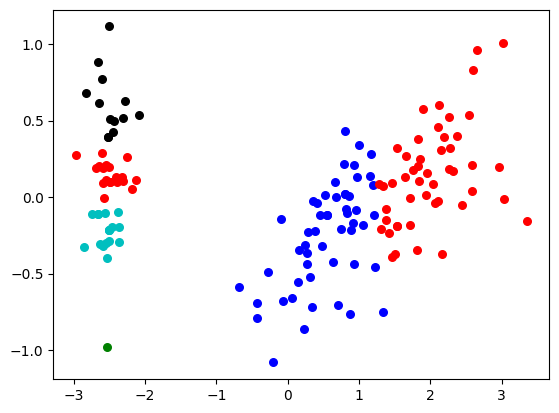

In [59]:
k_means = K_Means(k = 3, tolerance = 0.001, max_iter = 100)
k_means.fit(dataReduced)

'''  
    Definição das possíveis cores para rotular
    os cluster no processo de treinamento (fit)
'''
colors = 10*["r", "g", "c", "b", "k"]

for cluster_index in k_means.classes:
        color = colors[cluster_index]
        for features in k_means.classes[cluster_index]:
            plt.scatter(features[0], features[1], color = color,s = 30)


<P>
Tópico C - O programa deverá produzir como saída um arquivo indicando para cada elemento, o grupo ao qual ele foi associado.<br>   
Tópico D - Se estiver usando alguma ferramenta de alto nível para programa em Python, é necessario de enviar também o arquivo .py  
</P>

In [60]:
#display(k_means.classes)

classes = []
for i in range(len(dataReduced)):
    classes.append(k_means.predict(dataReduced[i]))

OutputCSV = irisData
if 'Grupo' not in OutputCSV.columns:
    OutputCSV.insert(OutputCSV.shape[1], 'Grupo', classes, False)

else:
    print('Classificação já atribuída')

OutputCSV.to_csv('Resultado.csv' )
display(OutputCSV)


Classificação já atribuída


,B,C,D,Grupo
A,,,,
5.1,3.5,1.4,0.2,2
4.9,3.0,1.4,0.2,2
4.7,3.2,1.3,0.2,2
4.6,3.1,1.5,0.2,2
5.0,3.6,1.4,0.2,2
...,...,...,...,...
6.7,3.0,5.2,2.3,1
6.3,2.5,5.0,1.9,1
6.5,3.0,5.2,2.0,1
